In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train_LZdllcl.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.shape

(54808, 14)

In [5]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

<AxesSubplot:>

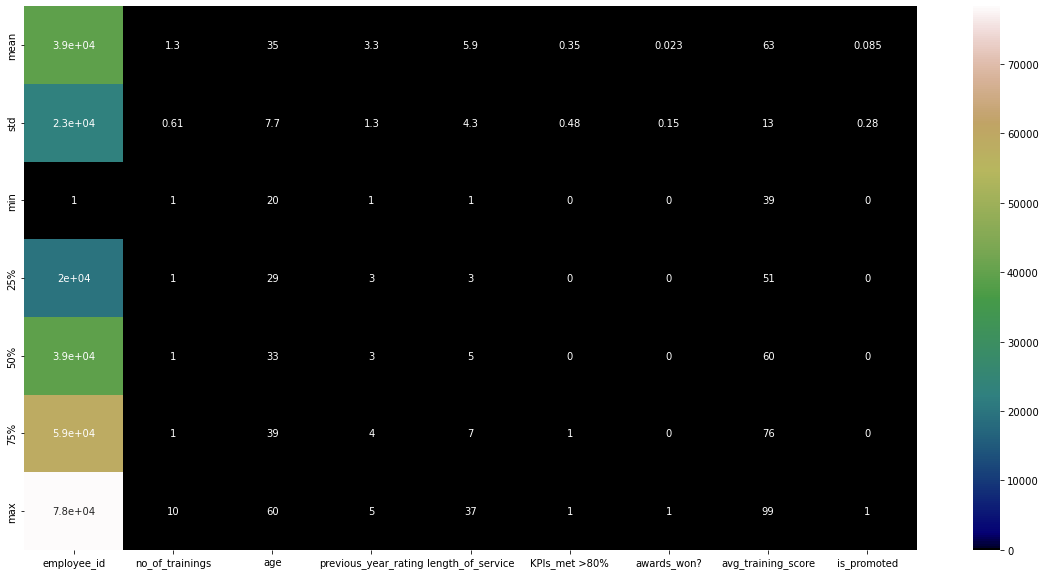

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe()[1:],annot=True, cmap='gist_earth')

In [8]:
df.describe(include=object)

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [9]:
df.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [10]:
df['gender']=df['gender'].map({'m':1, 'f':0})

In [11]:
df['gender'].value_counts(normalize=True)

1    0.702379
0    0.297621
Name: gender, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

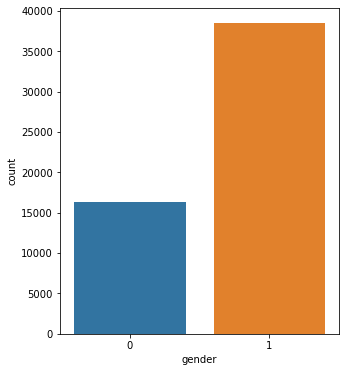

In [12]:
plt.figure(figsize=(5,6))
sns.countplot(df['gender'])

<AxesSubplot:xlabel='age', ylabel='count'>

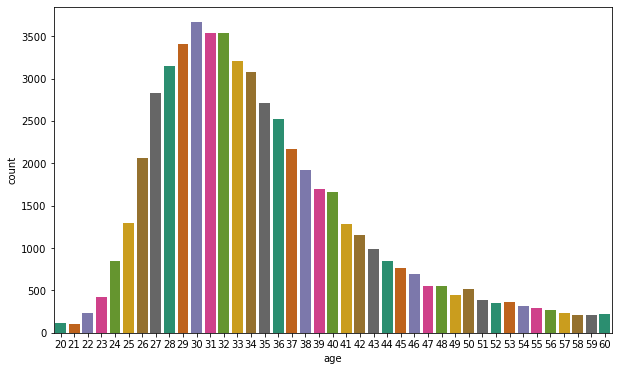

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['age'], palette='Dark2')

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

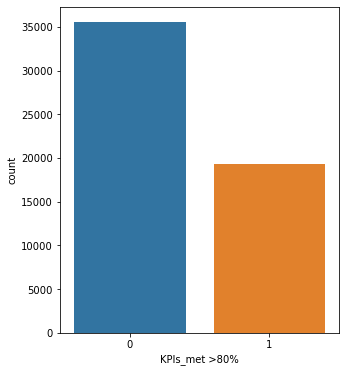

In [14]:
plt.figure(figsize=(5,6))
sns.countplot(df['KPIs_met >80%'])

In [15]:
df['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [16]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [17]:
df['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [18]:
df['previous_year_rating'].mode()

0    3.0
Name: previous_year_rating, dtype: float64

In [19]:
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

In [20]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

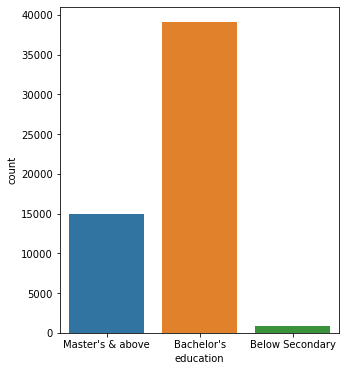

In [21]:
plt.figure(figsize=(5,6))
sns.countplot(df['education'])

In [22]:
a_mean=df['age'].mean()
a_median=df['age'].median()
a_stddev=df['age'].mean()-df['age'].std(), df['age'].mean()+df['age'].std(),
a_mean, a_median, a_stddev

(34.80391548679025, 33.0, (27.143746285204365, 42.46408468837614))

<AxesSubplot:xlabel='age', ylabel='Density'>

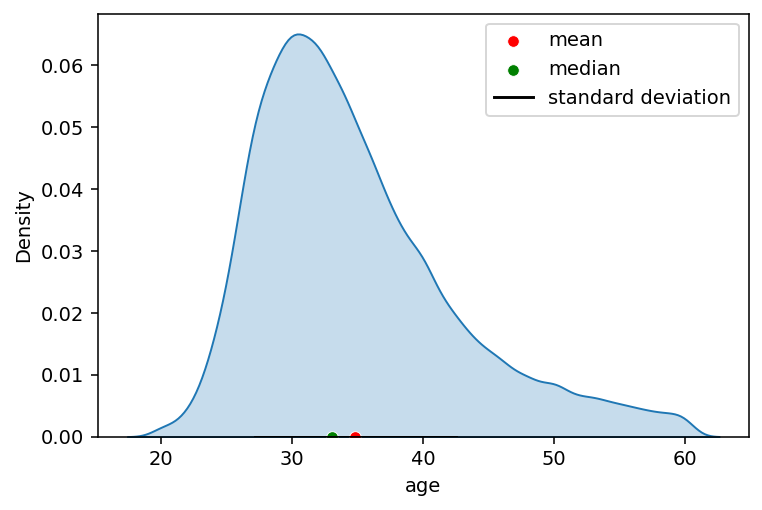

In [23]:
plt.figure(dpi=140)
sns.kdeplot(df['age'], shade=True)
sns.scatterplot([a_mean], [0], color='red', label='mean')
sns.scatterplot([a_median], [0], color='green', label='median')
sns.lineplot( a_stddev, [0,0], color='black', label='standard deviation')

In [24]:
df['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

<AxesSubplot:>

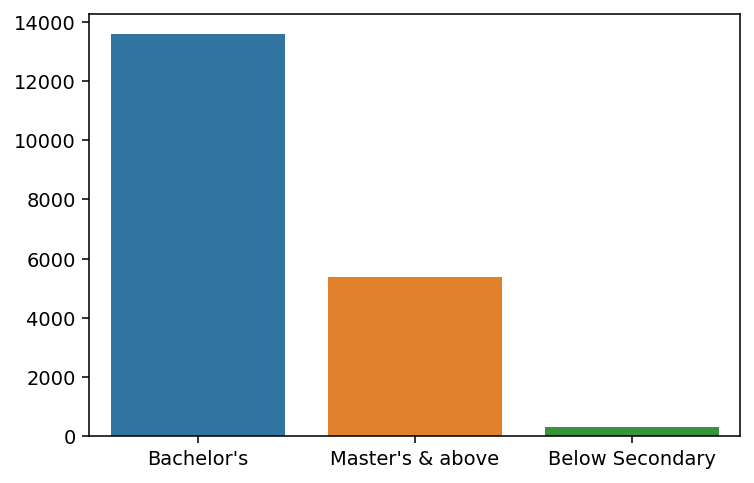

In [25]:
plt.figure(dpi=140)
sns.barplot(x=df[df['KPIs_met >80%']==1]['education'].value_counts().index,y=df[df['KPIs_met >80%']==1]['education'].value_counts().values)

<AxesSubplot:>

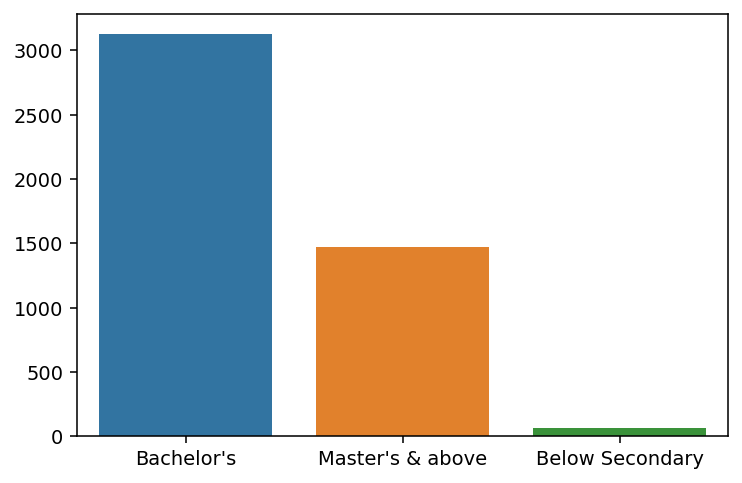

In [26]:
plt.figure(dpi=140)
sns.barplot(x=df[df['is_promoted']==1]['education'].value_counts().index,y=df[df['is_promoted']==1]['education'].value_counts().values)

(1000.0, 30000.0)

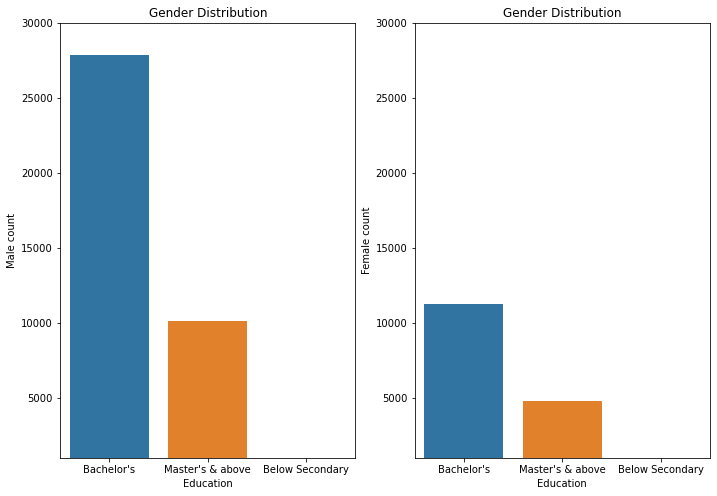

In [27]:
plt.figure(figsize=(18,8))

plt.subplot(131)
sns.barplot(x=df[df['gender']==1]['education'].value_counts().index,y=df[df['gender']==1]['education'].value_counts().values)
plt.title('Gender Distribution')
plt.ylabel('Male count')
plt.xlabel('Education')
plt.ylim(1000,30000)


plt.subplot(132)
sns.barplot(x=df[df['gender']==0]['education'].value_counts().index,y=df[df['gender']==0]['education'].value_counts().values)
plt.title('Gender Distribution')
plt.ylabel('Female count')
plt.xlabel('Education')
plt.ylim(1000,30000)

In [28]:
df.pivot_table('is_promoted',['gender', 'education'],'department', aggfunc='mean')*100

department               Analytics   Finance         HR     Legal  Operations  \
gender education                                                                
0      Bachelor's        12.473573  8.159393   4.784689  4.237288    8.550414   
       Below Secondary         NaN  3.125000   3.389831  0.000000    8.771930   
       Master's & above   7.500000  9.016393   8.125000  4.545455   11.643331   
1      Bachelor's         8.849558  8.119658   4.623656  5.428571    7.904722   
       Below Secondary         NaN  6.756757  10.144928  7.142857    5.042017   
       Master's & above  11.033099  8.488064   6.779661  3.731343   11.061947   

department               Procurement        R&D  Sales & Marketing  Technology  
gender education                                                                
0      Bachelor's          10.186092   5.714286           5.373526   10.422234  
       Below Secondary      6.779661        NaN                NaN   12.328767  
       Master's & above    14.586847  18.181818           6.127168    8.649289  
1      Bachelor's           7.470078   6.915888           7.202696   10.801394  
       Below Secondary      2.857143        NaN                NaN   17.187500  
       Master's & above     8.836524   6.388206           8.754923   11.760355

In [29]:
age=pd.cut(df['age'],[0,25,50,100])
df.pivot_table('is_promoted',['gender', 'education',age],'department', aggfunc='mean')*100

department                         Analytics    Finance         HR      Legal  \
gender education        age                                                     
0      Bachelor's       (0, 25]    10.000000   6.250000   0.000000  33.333333   
                        (25, 50]   12.526998   8.488613   5.474453   3.539823   
                        (50, 100]        NaN   0.000000   0.000000   0.000000   
       Below Secondary  (0, 25]          NaN   0.000000   3.636364   0.000000   
                        (25, 50]         NaN  16.666667   0.000000   0.000000   
       Master's & above (0, 25]          NaN        NaN        NaN        NaN   
                        (25, 50]    7.500000   8.928571   8.208955   0.000000   
                        (50, 100]        NaN  10.000000   7.692308  16.666667   
1      Bachelor's       (0, 25]     3.636364   9.322034   4.347826   0.000000   
                        (25, 50]    9.153570   8.022240   4.727273   5.740181   
                        (50, 100]   4.000000   7.407407   2.777778   0.000000   
       Below Secondary  (0, 25]          NaN   7.462687  10.937500   0.000000   
                        (25, 50]         NaN   0.000000   0.000000   9.756098   
       Master's & above (0, 25]     0.000000        NaN        NaN        NaN   
                        (25, 50]   10.676533   8.963585   6.611570   0.892857   
                        (50, 100]  18.000000   0.000000   8.000000  18.181818   

department                         Operations  Procurement        R&D  \
gender education        age                                             
0      Bachelor's       (0, 25]      3.409091     3.529412   0.000000   
                        (25, 50]     8.913188    10.595303   5.882353   
                        (50, 100]    4.458599     8.730159        NaN   
       Below Secondary  (0, 25]      8.888889     7.547170        NaN   
                        (25, 50]     8.333333     0.000000        NaN   
       Master's & above (0, 25]      0.000000          NaN        NaN   
                        (25, 50]    11.485944    15.523810  18.181818   
                        (50, 100]   13.513514     7.352941        NaN   
1      Bachelor's       (0, 25]      2.747253    11.627907   7.692308   
                        (25, 50]     8.249772     7.435441   6.896552   
                        (50, 100]    4.597701     4.395604        NaN   
       Below Secondary  (0, 25]      5.813953     3.225806        NaN   
                        (25, 50]     3.030303     0.000000        NaN   
       Master's & above (0, 25]           NaN          NaN        NaN   
                        (25, 50]    11.179361     9.068010   6.388206   
                        (50, 100]   10.000000     7.185629        NaN   

department                         Sales & Marketing  Technology  
gender education        age                                       
0      Bachelor's       (0, 25]             3.726708    8.270677  
                        (25, 50]            5.621891   10.860281  
                        (50, 100]           3.389831    6.060606  
       Below Secondary  (0, 25]                  NaN   13.432836  
                        (25, 50]                 NaN    0.000000  
       Master's & above (0, 25]             0.000000    0.000000  
                        (25, 50]            6.524467    8.994709  
                        (50, 100]           1.492537    5.813953  
1      Bachelor's       (0, 25]             6.707946    8.383234  
                        (25, 50]            7.284621   11.184211  
                        (50, 100]           6.549118    5.882353  
       Below Secondary  (0, 25]                  NaN   17.094017  
                        (25, 50]                 NaN   18.181818  
       Master's & above (0, 25]             0.000000         NaN  
                        (25, 50]            9.012876   12.310287  
                        (50, 100]           6.015038    7.831325

In [30]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='Density'>

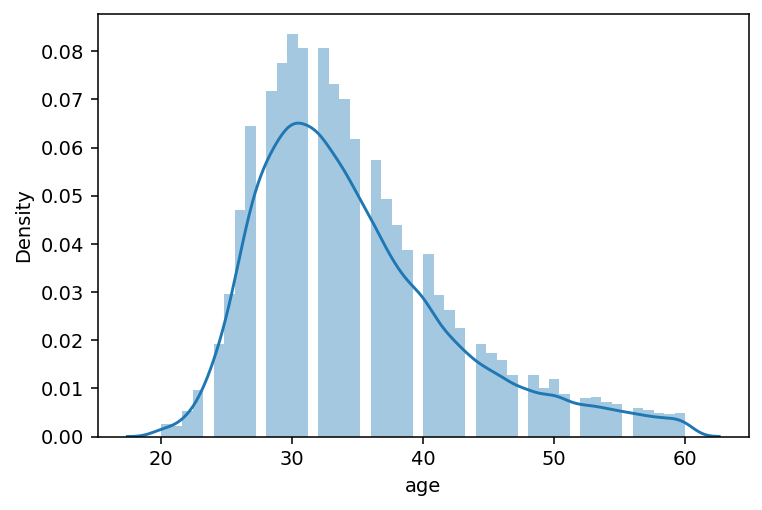

In [31]:
plt.figure(dpi=140)
sns.distplot(df['age'])

Text(0.5, 1.0, 'Distribution of employees')

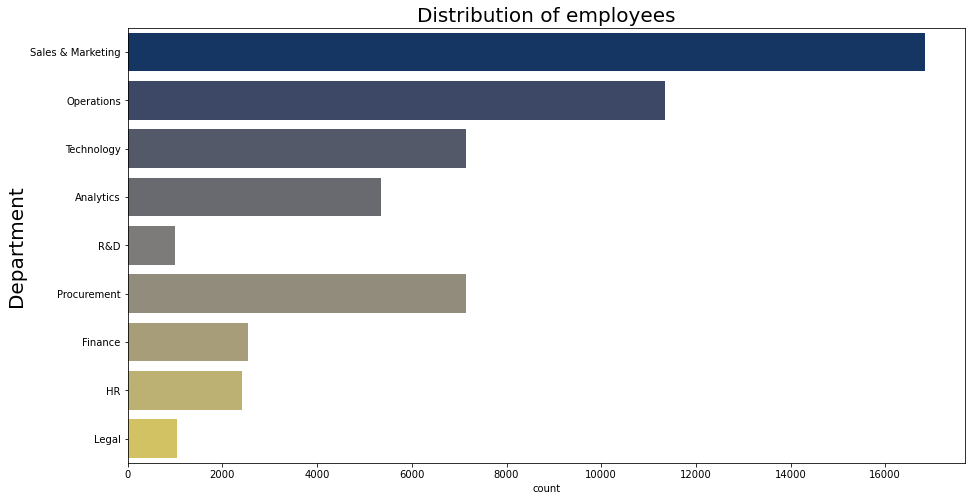

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(y=df['department'], palette='cividis')
plt.ylabel('Department',fontsize=20)
plt.title('Distribution of employees', fontsize=20)

Text(0.5, 1.0, 'Distribution of employees')

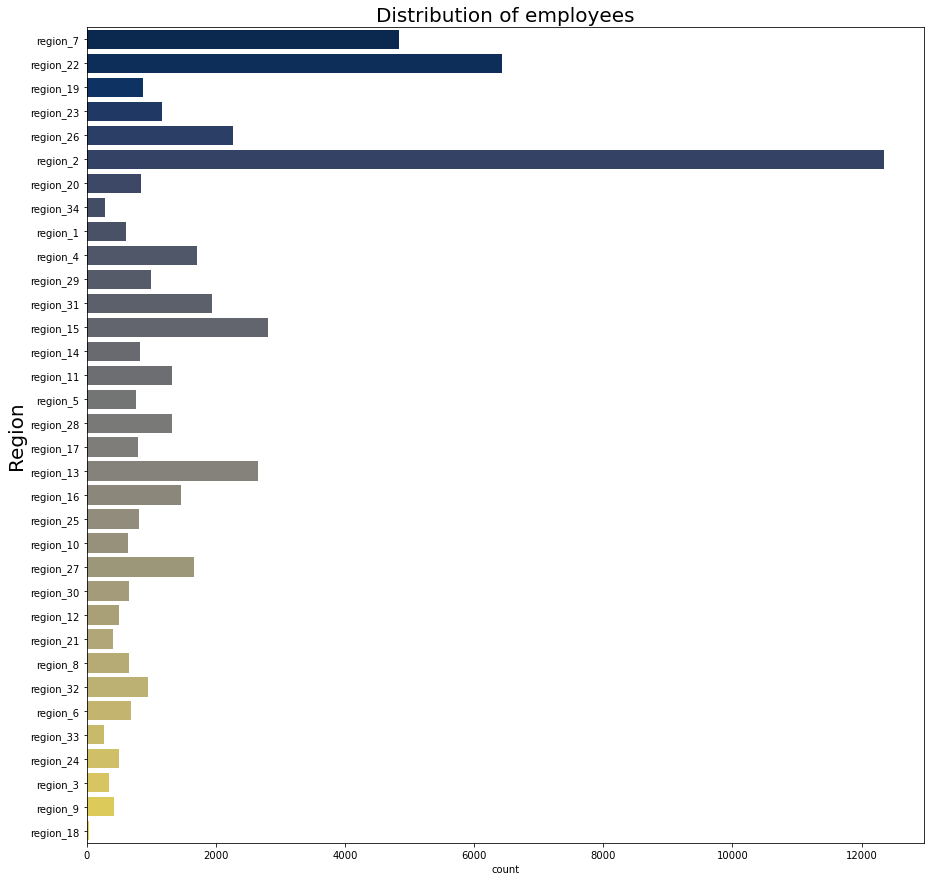

In [33]:
plt.figure(figsize=(15,15))
sns.countplot(y=df['region'], palette='cividis')
plt.ylabel('Region', fontsize=20)
plt.title('Distribution of employees', fontsize=20)

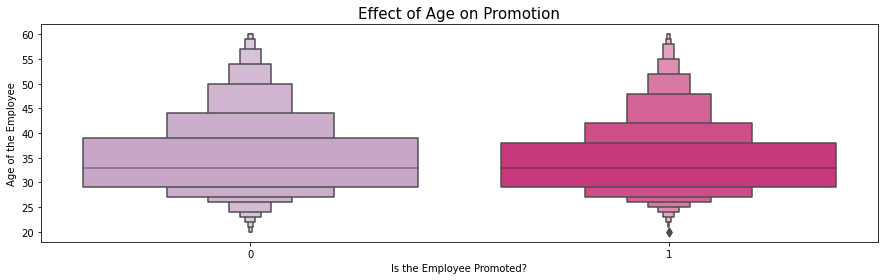

In [34]:
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(df['is_promoted'], df['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

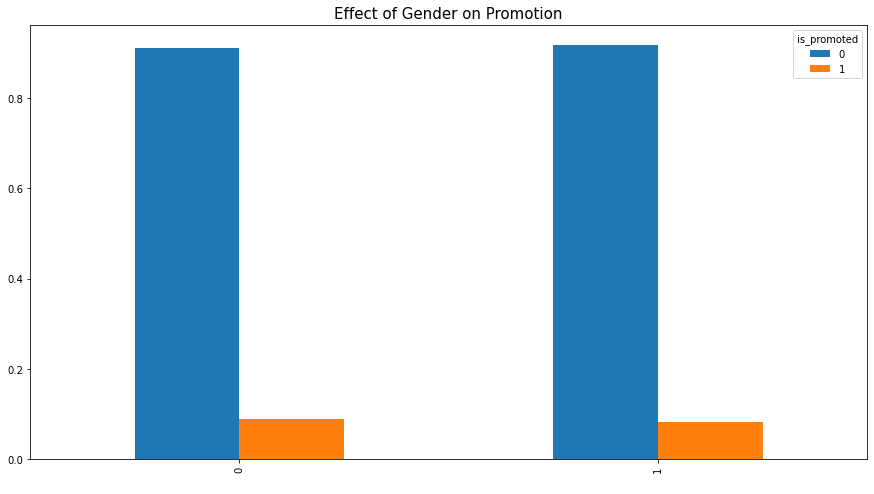

In [35]:
plt.rcParams['figure.figsize'] = (15, 8)
x = pd.crosstab(df['gender'], df['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

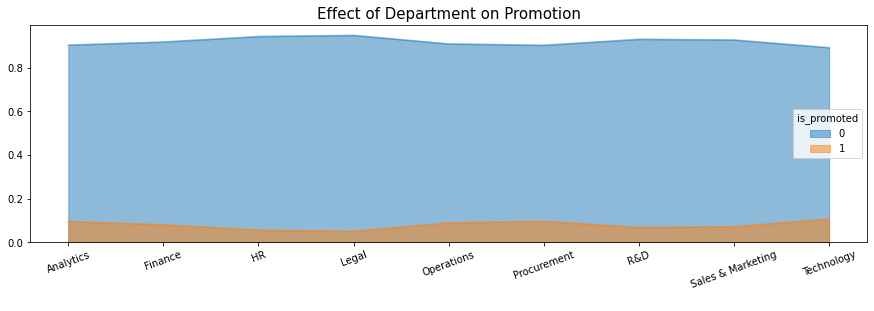

In [36]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(df['department'], df['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

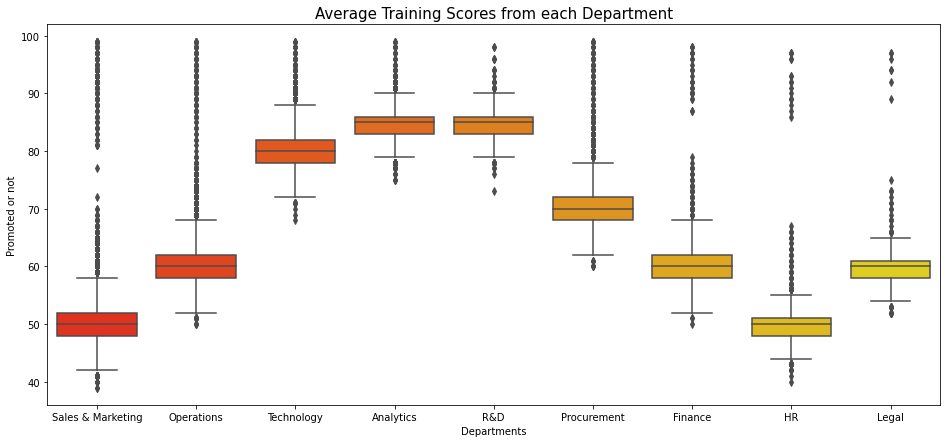

In [37]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(df['department'], df['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

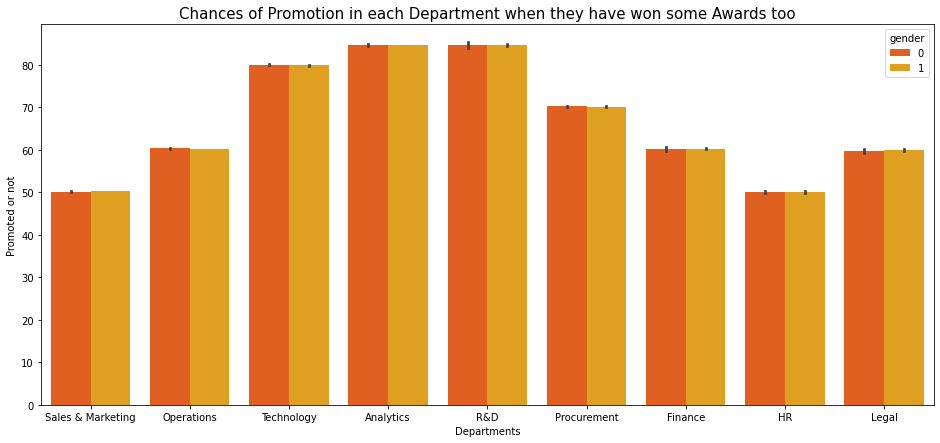

In [38]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(df['department'], df['avg_training_score'], hue = df['gender'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

In [39]:
young=df[df['age']<=30]#The Probability of an young Employee to getting Promotion 
old=df[df['age']>=30]

In [40]:
young['is_promoted'].value_counts()

0    16568
1     1550
Name: is_promoted, dtype: int64

In [41]:
old['is_promoted'].value_counts()

0    36913
1     3442
Name: is_promoted, dtype: int64

In [42]:
per_y=3909/(40237+3909)
perc_old = 759/(9909+759)
print("The Probability of an young Employee to get Promotion is : {0:.2f}%".format(per_y*100))
print("The Probability of an old Employee to get Promotion is : {0:.2f}%".format(perc_old*100))

The Probability of an young Employee to get Promotion is : 8.85%
The Probability of an old Employee to get Promotion is : 7.11%


In [43]:
award_wining_employees = df[df['awards_won?']==1]#Award impact on promotion.
award_wining_employees['is_promoted'].value_counts()

0    711
1    559
Name: is_promoted, dtype: int64

In [44]:
probability = 559/(559+711)
print("The Probability of an Employee to get Promotion is : {0:.2f}%".format(probability*100))

The Probability of an Employee to get Promotion is : 44.02%


In [45]:
No_award = df[df['awards_won?']==0]
No_award['is_promoted'].value_counts()

0    49429
1     4109
Name: is_promoted, dtype: int64

In [46]:
probability = 4109/(4109+49429)#diffrence is clear 
print("The Probability of an Employee to get Promotion is : {0:.2f}%".format(probability*100))

The Probability of an Employee to get Promotion is : 7.67%


In [47]:
avg_score = df[df['is_promoted']==1]
x=avg_score['avg_training_score'].mean()
print(f'Average score of promoted employee is : {x}')

print("**************************************************************************")

avg_score = df[df['is_promoted']==0]
x=avg_score['avg_training_score'].mean()
print(f'Average score of not promoted employee is : {x}')

Average score of promoted employee is : 71.32519280205655
**************************************************************************
Average score of not promoted employee is : 62.64768647786199


In [48]:
fresher= df[df['length_of_service']<2]
fresher['is_promoted'].value_counts()

0    4170
1     377
Name: is_promoted, dtype: int64

In [49]:
fresher_probability = 377/(377+4170)
print(f'Probability of fresher to get promoted is : {fresher_probability*100}')

Probability of fresher to get promoted is : 8.291180998460524


In [50]:
fresher_probability = 4170/(4170+377)
print(f'Probability of fresher to not get promoted is : {fresher_probability*100}')

Probability of fresher to not get promoted is : 91.70881900153948


In [51]:
df.select_dtypes(['int64','float64']).dtypes

employee_id               int64
gender                    int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [52]:
INT=['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']

In [53]:
def unv(df, group):
    size=len(group)
    plt.figure(figsize=(8*size,5), dpi=140)
    
    for j,i in enumerate(group):
        
        mini= df[i].min()
        maxx= df[i].max()
        rag = df[i].max()-df[i].min()
        mean= df[i].mean()
        median= df[i].median()
        std = df[i].std()
        skew= df[i].skew()
        kurt = df[i].kurtosis()
        
        points= mean-std , mean+std
        
        plt.subplot(1,size, j+1) 
        sns.kdeplot(df[i], shade=True)
        sns.lineplot(points, [0,0], color='black', label='std')
        sns.scatterplot([mini,maxx], [0,0], color='orange', label='min/max')
        sns.scatterplot([mean], [0], color='red', label='mean')
        sns.scatterplot([median], [0], color='yellow', label='median')
        plt.xlabel('{}'.format(i), fontsize=30)
        plt.ylabel('Density')
        plt.title('std= {} Kurtosis = {}; \n skew= {} range= {} \n mean= {} median={}'.format((round(points[0],2), round(points[0],2)),
                                                                                             round(kurt,2),
                                                                                             round(skew,2),
                                                                                             (round(mini,2),round(maxx,2), round(rag,2)),
                                                                                             round(mean,2),
                                                                                             round(median,2)))

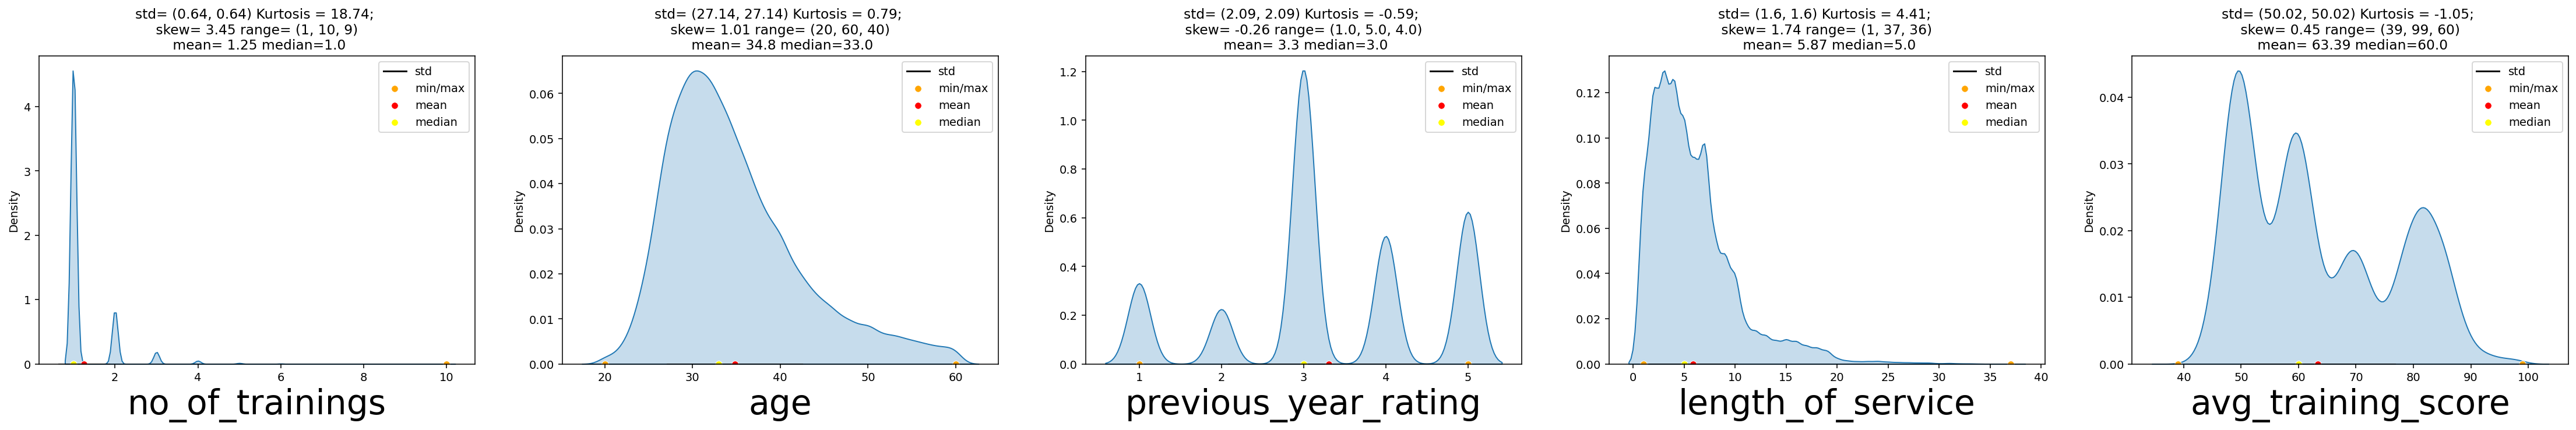

In [54]:
unv(df, INT)

In [55]:
import statsmodels.api as sm 
import scipy.stats as stats
import pylab as py
def normality(df, group):
    size=len(group)
    for j,i in enumerate(group):
        plt.figure(figsize=(5*size,5), dpi=140)
        plt.subplot(1,2,1)
        sns.kdeplot(df[i], shade=True)
        plt.subplot(1,2,2)
        stats.probplot(df[i], plot=py)
        plt.show()

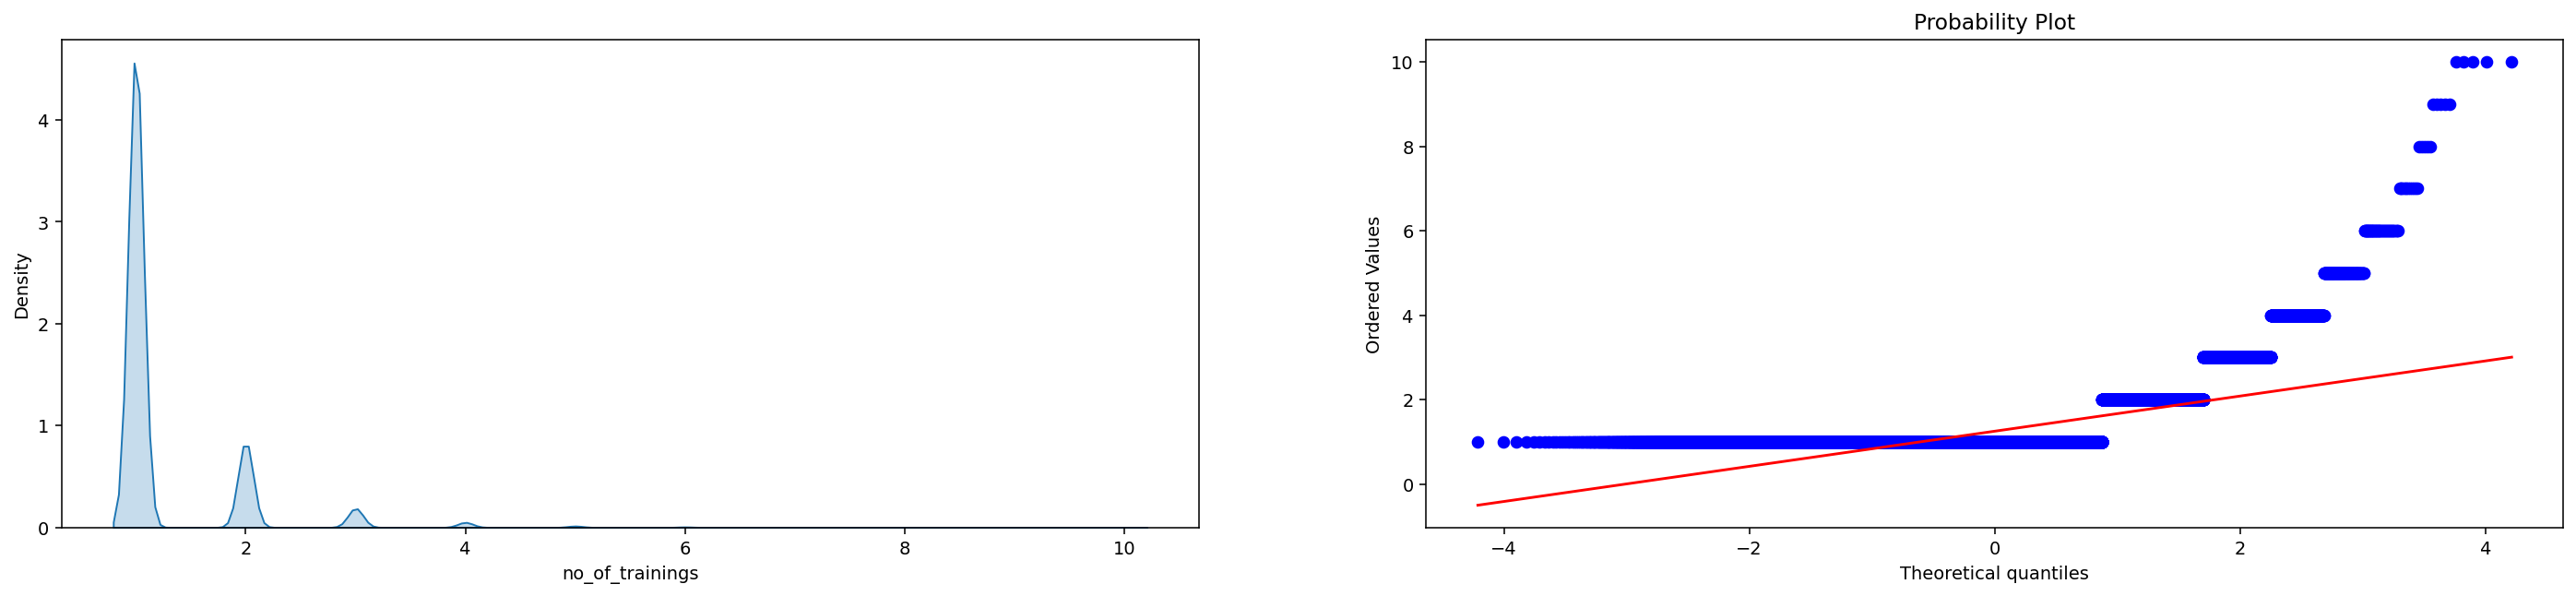

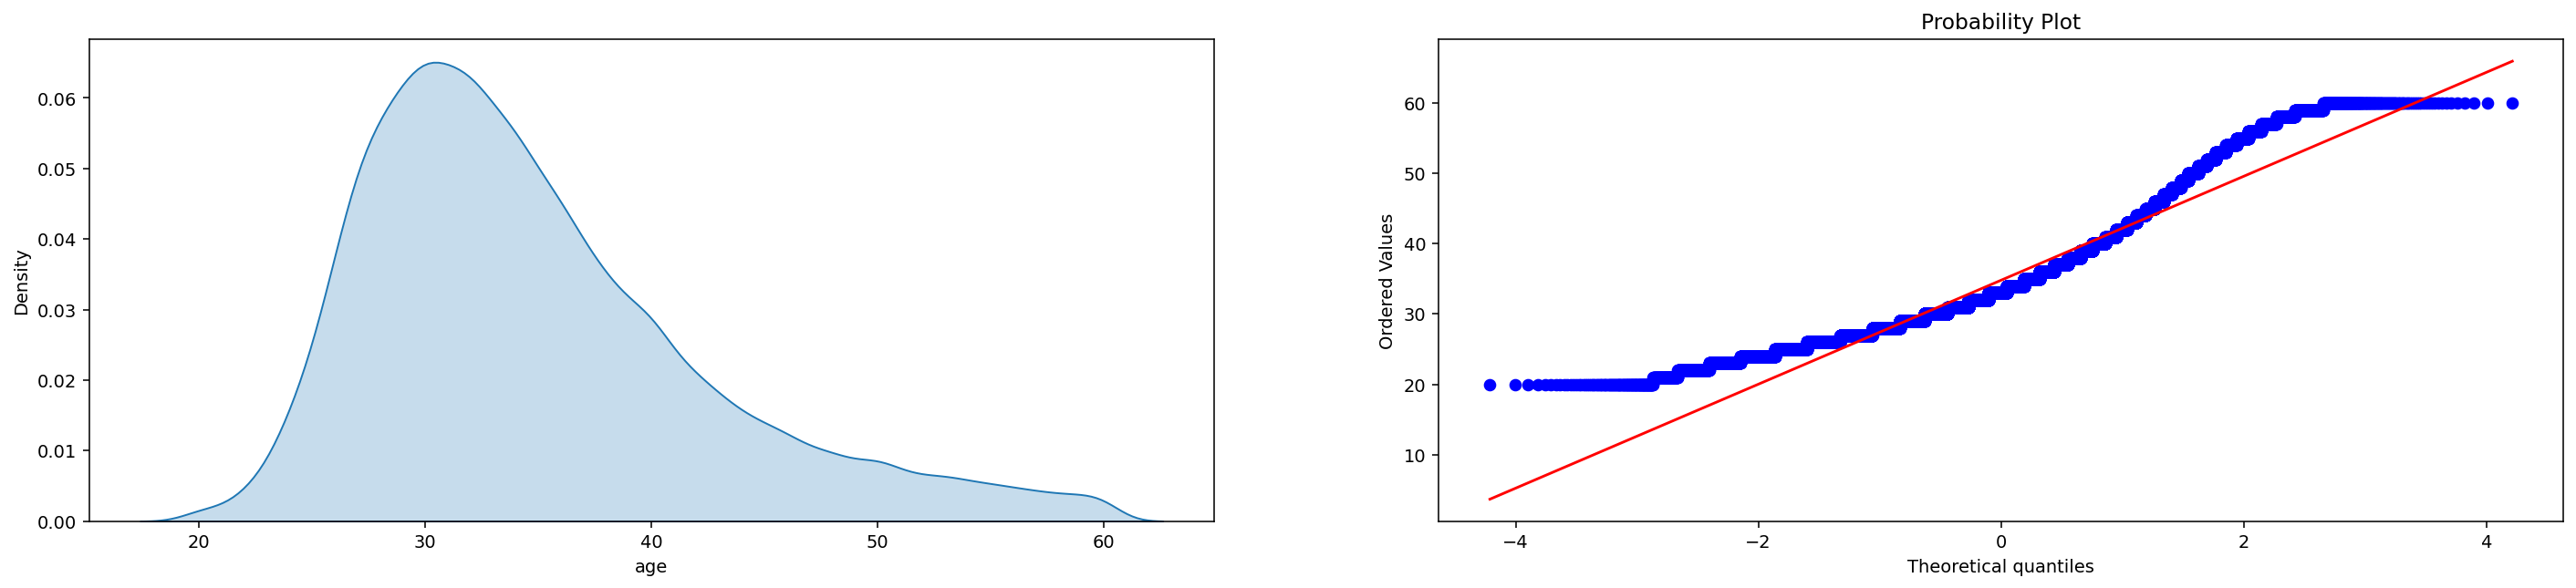

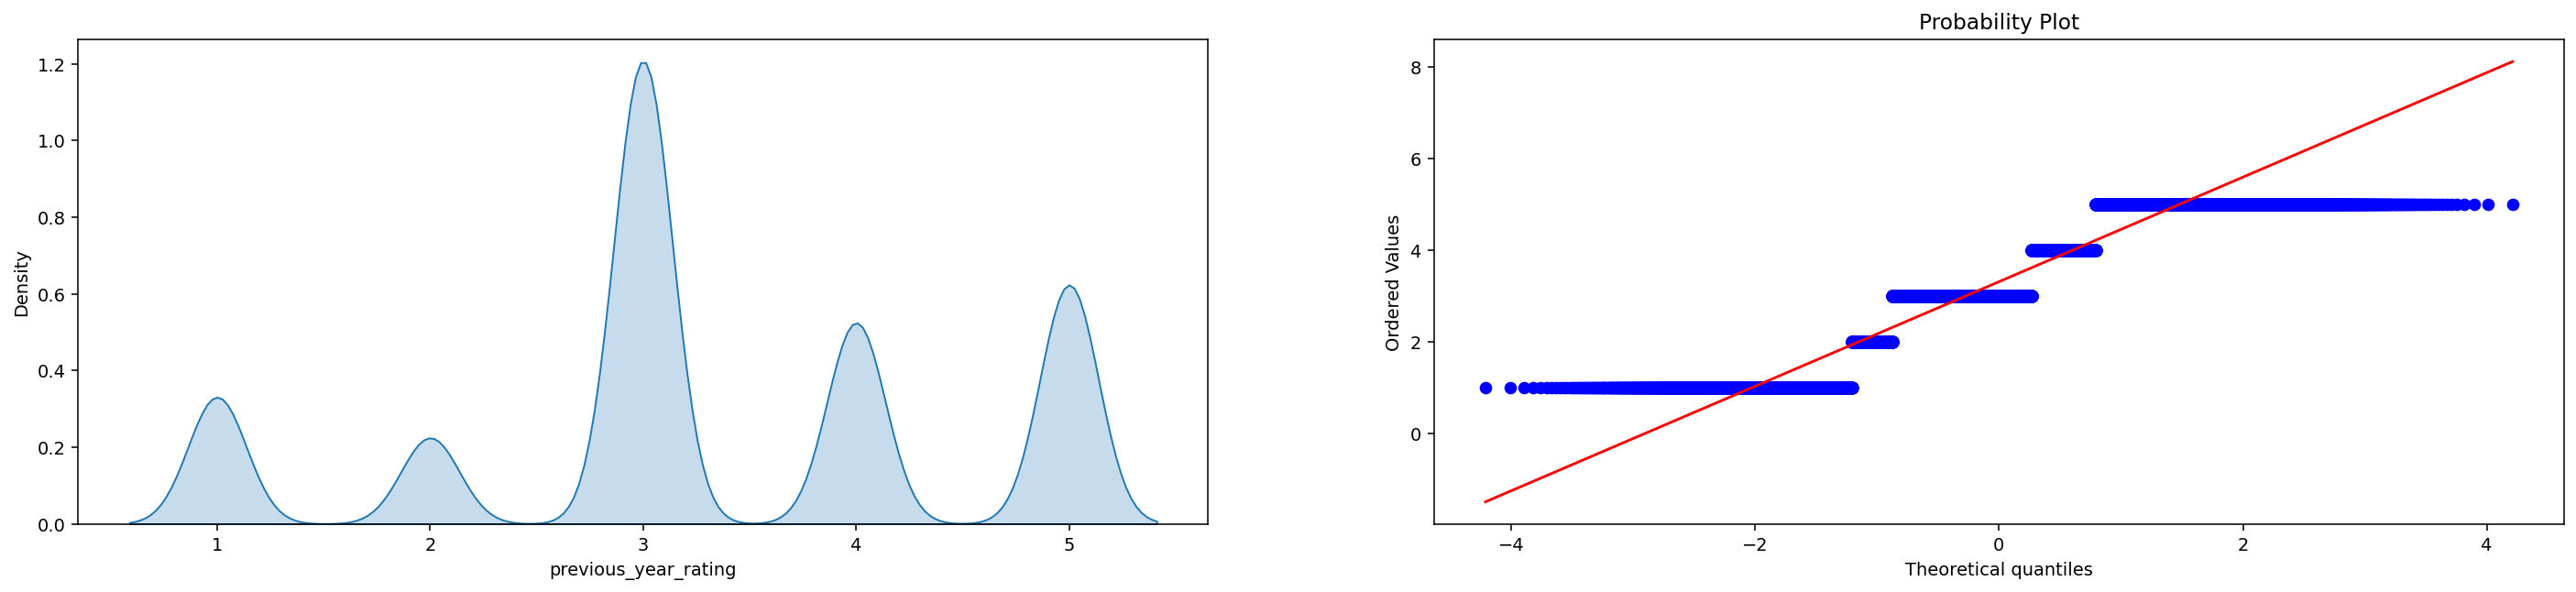

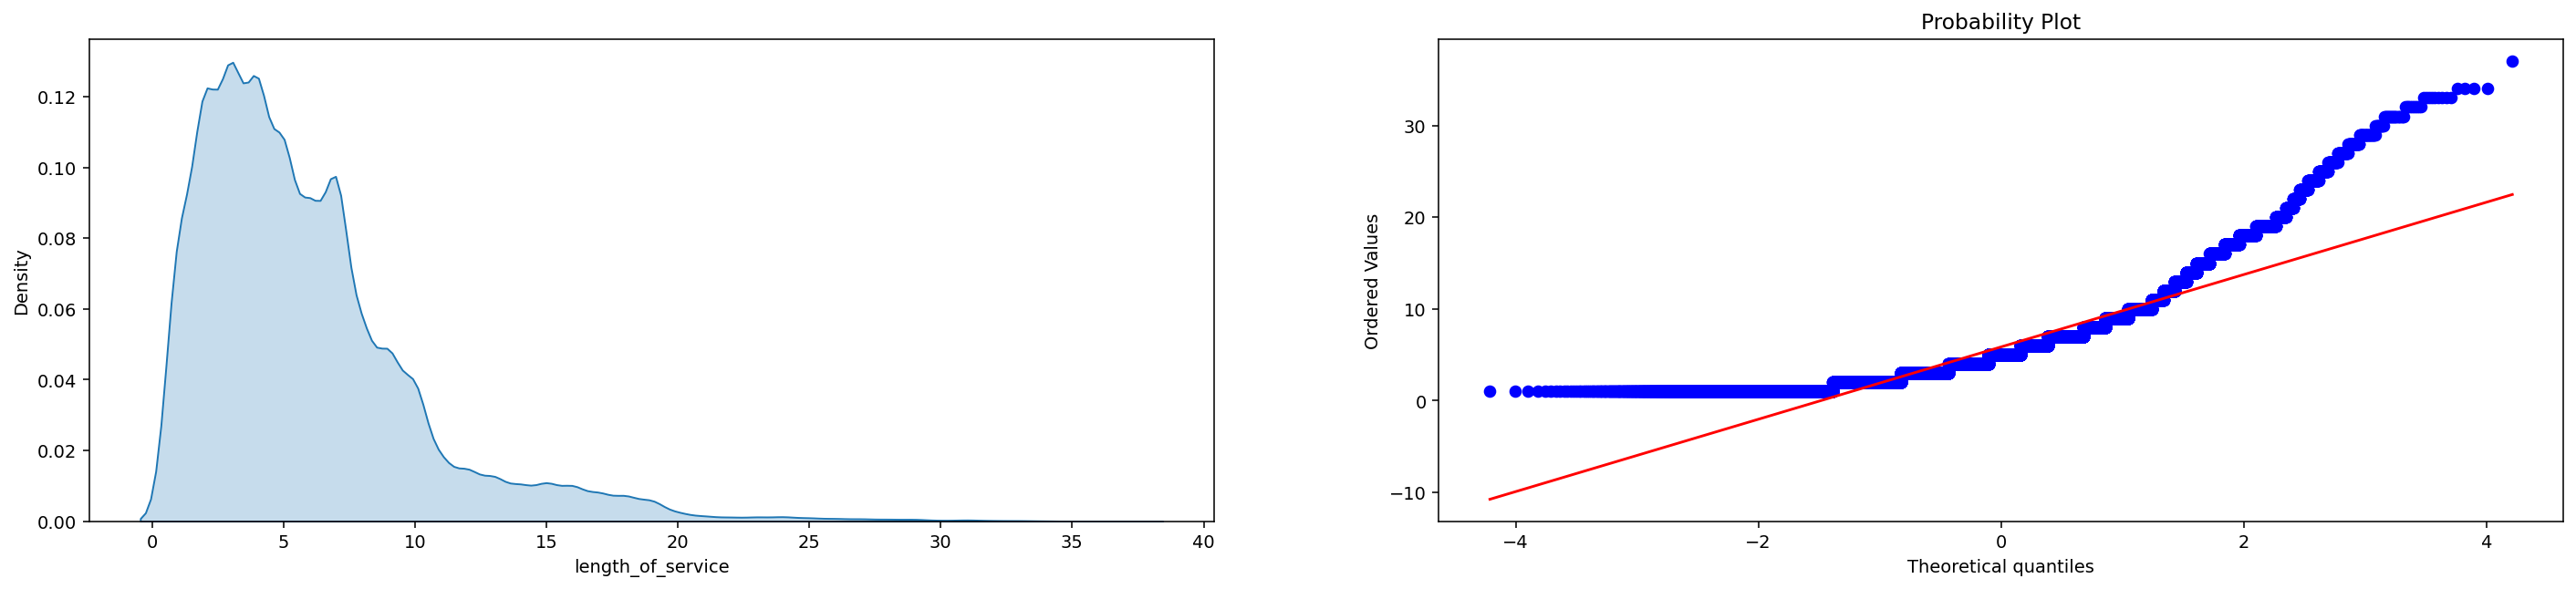

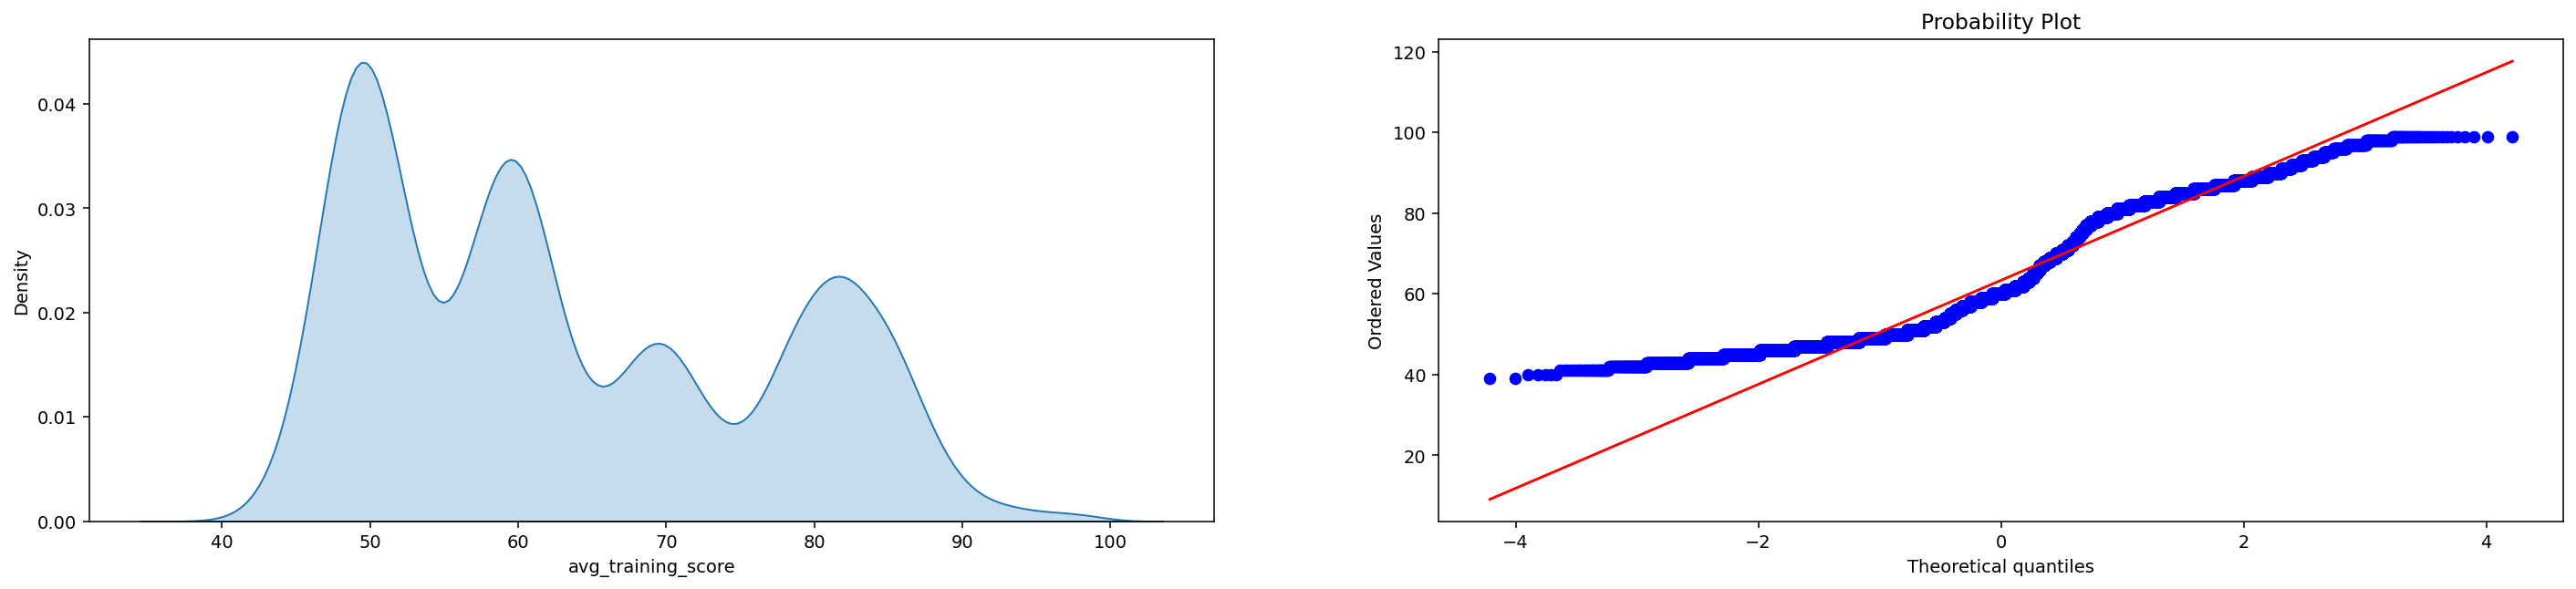

In [56]:
normality(df, INT)

In [57]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [58]:
label_encoder=['department','education','recruitment_channel']

In [59]:
def label(df, group):
    size=len(group)
    for j,i in enumerate(group):
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        label=le.fit_transform(df[i])
        df[i]=label

In [60]:
label(df, label_encoder)

In [61]:
X=df[['department','education', 'gender','recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating','length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score']]
y=df['is_promoted']

In [62]:
X.shape, y.shape

((54808, 11), (54808,))

In [63]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(X, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(100280, 11)
(100280,)


In [64]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4668
Name: is_promoted, dtype: int64
After Resampling :
0    50140
1    50140
Name: 0, dtype: int64


In [65]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

In [66]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

In [67]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

Training Accuracy : 0.9939170323095333
Testing Accuracy : 0.9288990825688074


In [70]:
from sklearn.metrics import f1_score
k = f1_score(y_pred, y_valid)
print('Test F1 Score    ', k )

Test F1 Score     0.9306217767831079


In [71]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=5, max_depth=14)
Rf.fit(x_train, y_train)
rf_pred=Rf.predict(x_valid)

In [72]:
print("Training Score: ", Rf.score(x_train, y_train))
print("Testing Score: ", Rf.score(x_valid, y_valid))
k = f1_score(rf_pred, y_valid)
print('Test F1 Score    ', k )

Training Score:  0.9011143797367371
Testing Score:  0.8813821300358995
Test F1 Score     0.8863625507523285


In [73]:
from sklearn.neighbors import KNeighborsClassifier as KNN
clf=KNN(n_neighbors=1)
clf.fit(x_train, y_train)
test_predict=clf.predict(x_valid)
k = f1_score(test_predict, y_valid)
print('Test F1 Score    ', k )

Test F1 Score     0.9142000386922035
